In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import genlaguerre


In [5]:
# Gives the value of the scalar function |U|^2 at z = 0 for a particular r
def umodsqr(r, l, p) :
    C = 1#np.sqrt((2*np.factorial(p))/(np.pi))#determine value later
    z_r = 1 #beam waist estimate return later
    w = 1E-6 #beam waist estimate
    
    u = C**2 * ((r * np.sqrt(2)) / w)**(l*2) * genlaguerre(p,l)(2 * r**2 / w**2)**2 * np.exp(2*(-r**2 / w**2))
    
    return u

In [6]:
#X, Y = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))

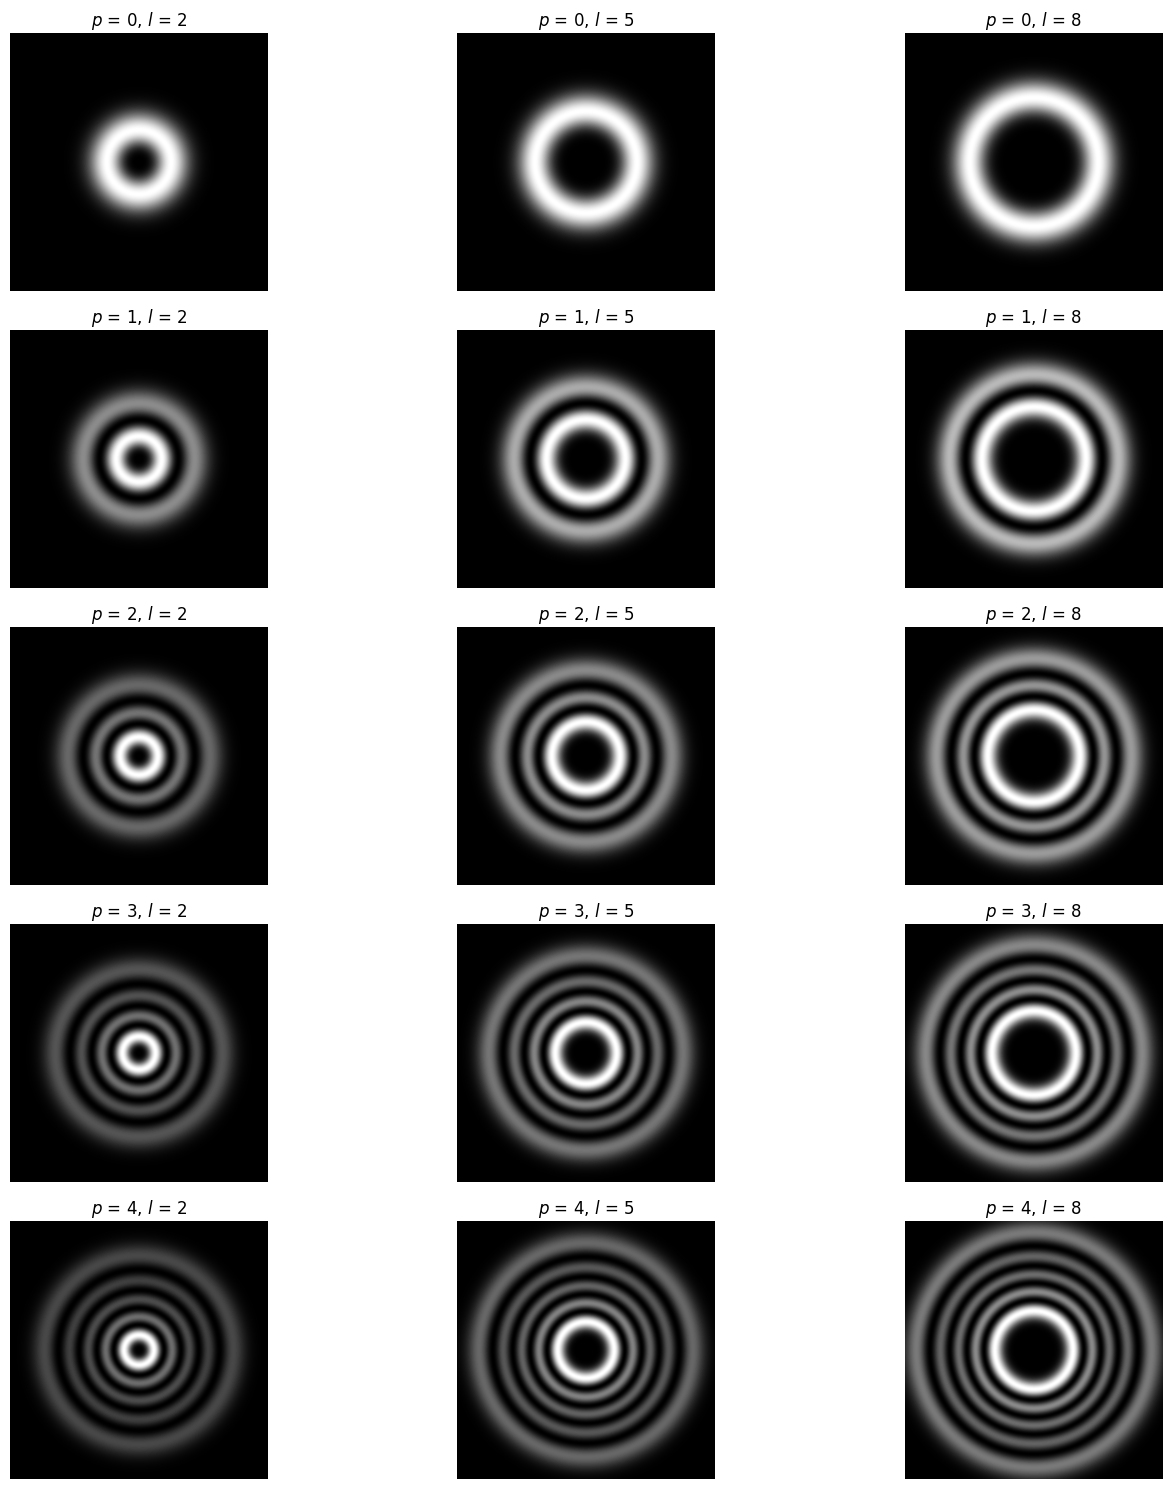

In [7]:
#Time and angle averaged orbital angular momentum density calculated about the origin
X, Y = np.meshgrid(np.linspace(-4E-6, 4E-6, 1000), np.linspace(-4E-6, 4E-6, 1000))
r = np.sqrt(X**2 + Y**2)
quaNum = 3
lgmodes = 5

fig, ax = plt.subplots(ncols = quaNum, nrows = lgmodes, figsize=(15,15))
for idx, ax in enumerate(np.ravel(ax)):
    p = (idx // quaNum)
    l = 3 * (idx % quaNum) + 2
    Z = umodsqr(r, l, p)
    ax.imshow(Z, cmap='gray')
    ax.set_title(f'$p$ = {p}, $l$ = {l}')
    ax.axis('off')
plt.tight_layout()
plt.show()

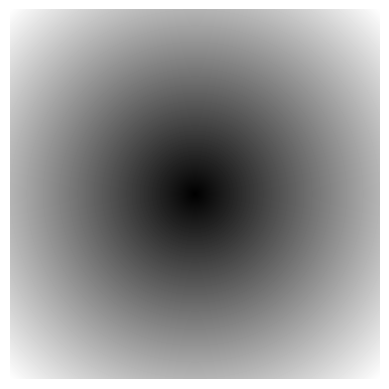

In [8]:
#example greyscale plots

def f(x):
    return x*(15-x)

Z = f(np.sqrt(X**2 + Y**2))

# plot
fig, ax = plt.subplots()

ax.imshow(Z, cmap='gray')
plt.axis('off')
plt.show()

In [16]:
def oam_time_avg(r, phi, l, p, omega) :
    oam_t_avg = (l * r) * np.cos(phi)**2 * umodsqr(r, l, p)/(8 * np.pi * omega)
    return oam_t_avg

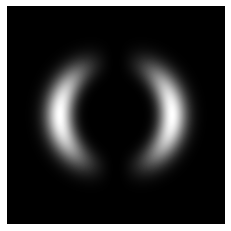

In [17]:
#Time averaged orbital angular momentum density calculated about origin 
X, Y = np.meshgrid(np.linspace(-4E-6, 4E-6, 1000), np.linspace(-4E-6, 4E-6, 1000))
r = np.sqrt(X**2 + Y**2)
phi = np.arctan2(Y,X)

Z = oam_time_avg(r, phi, 8, 0, 1)
plt.axis('off')
plt.imshow(Z, cmap='gray')

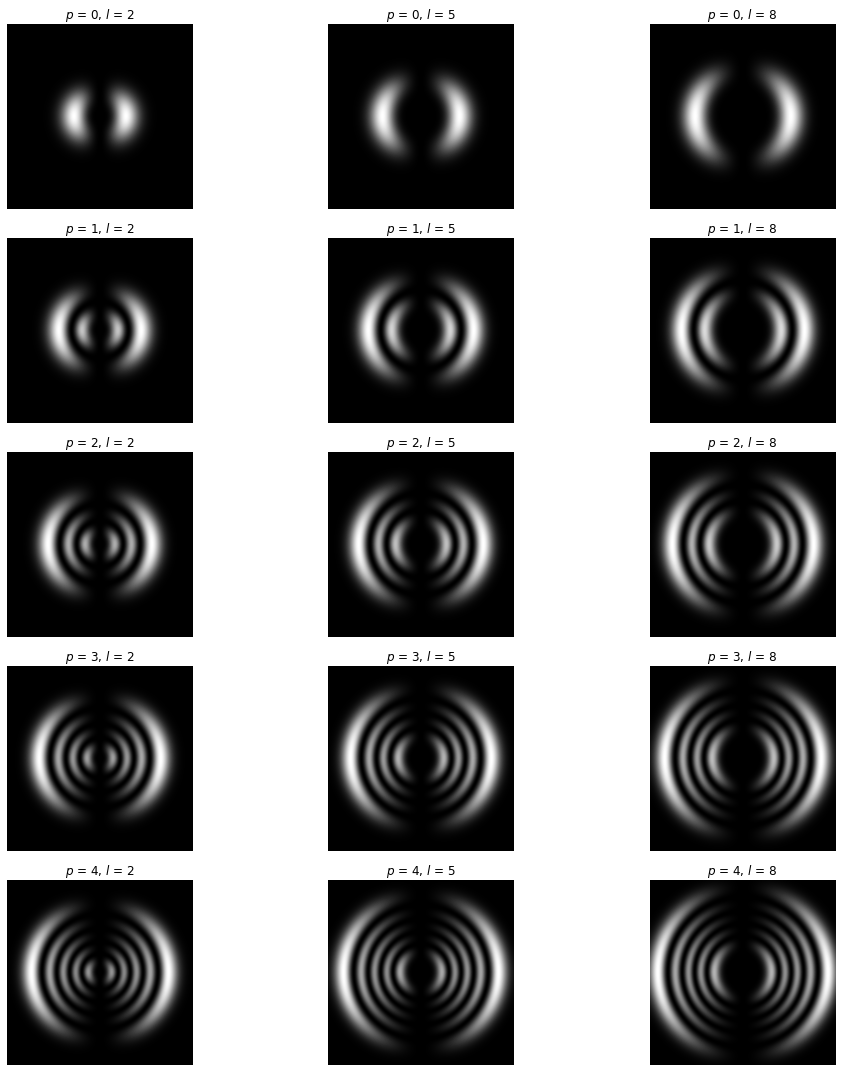

In [19]:
#Time averaged orbital angular momentum density calculated about the origin for several different modes
X, Y = np.meshgrid(np.linspace(-4E-6, 4E-6, 1000), np.linspace(-4E-6, 4E-6, 1000))
r = np.sqrt(X**2 + Y**2)
quaNum = 3
lgmodes = 5

fig, ax = plt.subplots(ncols = quaNum, nrows = lgmodes, figsize=(15,15))
for idx, ax in enumerate(np.ravel(ax)):
    p = (idx // quaNum)
    l = 3 * (idx % quaNum) + 2
    Z = oam_time_avg(r, phi, l, p, 1)
    ax.imshow(Z, cmap='gray')
    ax.set_title(f'$p$ = {p}, $l$ = {l}')
    ax.axis('off')
plt.tight_layout()
plt.savefig("/Users/micha/Desktop/oamdensitylinear.png", dpi=300)
plt.show()

In [ ]:
X, Y = np.meshgrid(np.linspace(-4E-6, 4E-6, 1000), np.linspace(-4E-6, 4E-6, 1000))
r = np.sqrt(X**2 + Y**2)
phi = np.arctan2(Y,X)


Z = oam_time_avg(r, phi, 8, 1, 1)
plt.axis('off')
plt.imshow(Z, cmap='gray')